In [561]:
#importing the libraries
import pandas as pd
import numpy as np
import nltk
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from nltk.corpus import brown
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [562]:
df = pd.DataFrame()

df = pd.read_csv (r'C:\Users\Latika\Downloads\textmining_2022.csv', sep=",")


In [563]:
df.dropna()

,Unnamed: 0,file,message
0,0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...,...
9995,9995,bass-e/_sent_mail/1047.,Message-ID: <21376194.1075854731510.JavaMail.e...
9996,9996,bass-e/_sent_mail/1048.,Message-ID: <2401643.1075854731531.JavaMail.ev...
9997,9997,bass-e/_sent_mail/1049.,Message-ID: <32002412.1075854731553.JavaMail.e...
9998,9998,bass-e/_sent_mail/105.,Message-ID: <21429983.1075854709202.JavaMail.e...


In [564]:
df['message']

0       Message-ID: <18782981.1075855378110.JavaMail.e...
1       Message-ID: <15464986.1075855378456.JavaMail.e...
2       Message-ID: <24216240.1075855687451.JavaMail.e...
3       Message-ID: <13505866.1075863688222.JavaMail.e...
4       Message-ID: <30922949.1075863688243.JavaMail.e...
                              ...                        
9995    Message-ID: <21376194.1075854731510.JavaMail.e...
9996    Message-ID: <2401643.1075854731531.JavaMail.ev...
9997    Message-ID: <32002412.1075854731553.JavaMail.e...
9998    Message-ID: <21429983.1075854709202.JavaMail.e...
9999    Message-ID: <20553983.1075854731575.JavaMail.e...
Name: message, Length: 10000, dtype: object

In [565]:
df['clean_message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word.isalnum()]))

In [566]:
rws = df['clean_message']

In [567]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split
rws['token_message']=rws.apply(lambda x: tokenize(x.lower()))


<ipython-input-567-59b2c93544e1>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [568]:
rws['token_message']

0       [14, may, 2001, 7bit, phillip, k, allen, tim, ...
1       [4, may, 2001, 7bit, phillip, k, allen, john, ...
2       [18, oct, 2000, test, 7bit, phillip, k, allen,...
3       [23, oct, 2000, 7bit, phillip, k, allen, randa...
4       [31, aug, 2000, hello, 7bit, phillip, k, allen...
                              ...                        
9995    [25, jan, 2000, super, bowl, party, 7bit, eric...
9996    [25, jan, 2000, 7bit, eric, bass, mail, i, cop...
9997    [25, jan, 2000, 9912, texas, financial, liquid...
9998    [6, dec, 2000, 7bit, eric, bass, mail, did, yo...
9999    [24, jan, 2000, 7bit, eric, bass, danielle, sa...
Name: clean_message, Length: 10000, dtype: object

In [625]:
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:11])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


In [637]:
newStopWords = ['ect', 'hou', 'com', 'recipient']
stopword.extend(newStopWords)

In [638]:
stopword.remove('ect')

In [639]:
stopword.remove('hou')

In [640]:
stopword.remove('com')

In [641]:
stopword.remove('recipient')

In [642]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
rws['stopwords_removed'] = rws['token_message'].apply(lambda x: remove_stopwords(x))


In [643]:
rws['message_str'] = [' '.join(map(str, l)) for l in rws['stopwords_removed']]


# visualisations

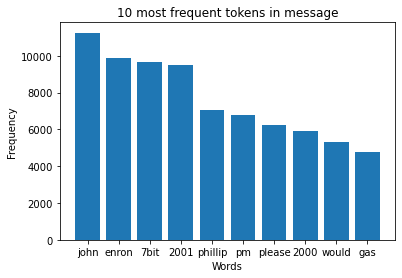

In [606]:
text = rws['message_str']
word_frequency = Counter(" ".join(text).split()).most_common(10)

# `most_common` returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

plt.bar(words, counts)
plt.title("10 most frequent tokens in message")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

In [604]:
freq = FreqDist(text)
mostcommon = freq.most_common(50)

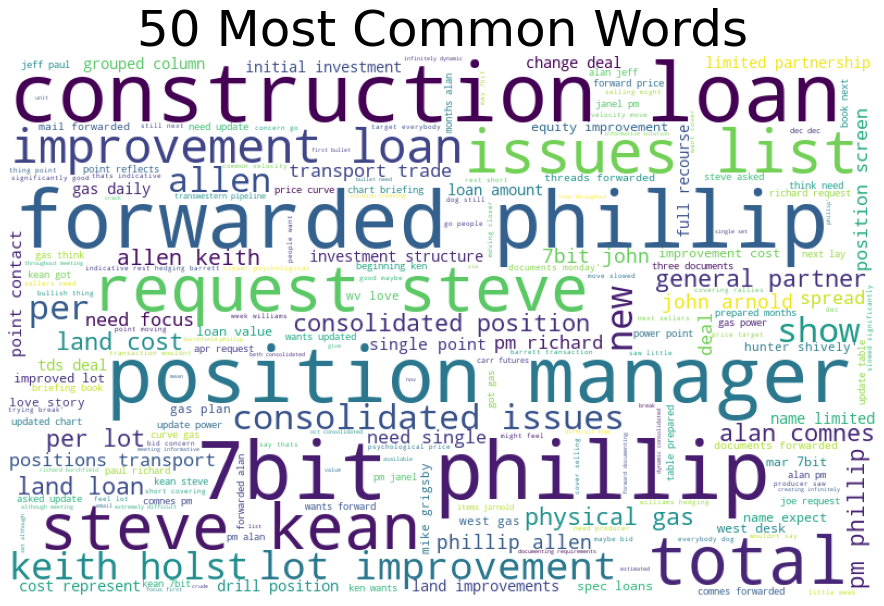

In [605]:
wordcloud = WordCloud(width=800, height=500, background_color='white').generate("".join(str(mostcommon)))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud)
plt.axis('off')
plt.title('50 Most Common Words', fontsize=50)
plt.show()

In [596]:
text = rws['message_str']
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
vectorizer.fit(text)


CountVectorizer()

In [601]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

count_vectorizer = CountVectorizer(preprocessor=preprocess_text, max_features=10, ngram_range=(2, 2))

# TFIDF

In [540]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(text)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(10))

            TF-IDF
belden    0.457615
forecast  0.446999
phillip   0.357897
14        0.334736
tim       0.325165
pallen    0.288480
mail      0.227110
may       0.212755
allen     0.200418
2001      0.131588


# KMeans clustering

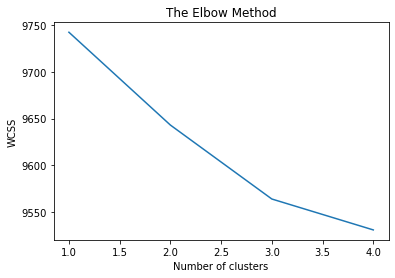

In [544]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)

wcss = []
for i in range(1,5):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=3,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,5),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()



In [548]:

true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms:")
centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind]),
    print


Top terms:
Cluster 0:
 enron
 please
 2001
 gas
 market
 2000
 7bit
 would
 john
 pm
Cluster 1:
 phillip
 allen
 7bit
 2000
 2001
 mail
 documents
 pm
 forwarded
 pallen
Cluster 2:
 john
 arnold
 2001
 7bit
 pm
 jarnold
 2000
 margaret
 jennifer
 kim


In [525]:
##kmeans clustering
X = text
from sklearn.datasets import make_blobs
X = make_blobs(centers =3,
              n_features = 4,
              cluster_std = 1.6,
              random_state = 50)

In [526]:
##create a kmeans object
kmeans = KMeans (n_clusters =3)


In [527]:
points = X[0]
kmeans.fit(points)

KMeans(n_clusters=3)

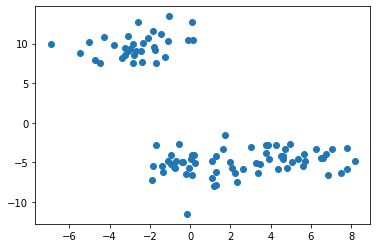

In [528]:
plt.scatter (X[0][:,0], X[0][:,1])

In [529]:
clusters = kmeans.cluster_centers_

In [532]:
print (clusters)

[[ 5.29483918 -4.43746415 -3.13269553 -2.79948796]
 [-2.68096115  9.7228058  -1.82887359  5.59668947]
 [ 0.20885695 -5.44872425 -4.66316624 -2.36332927]]


In [533]:
y_km = kmeans.fit_predict(points)

C:\Users\Latika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Latika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Latika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.


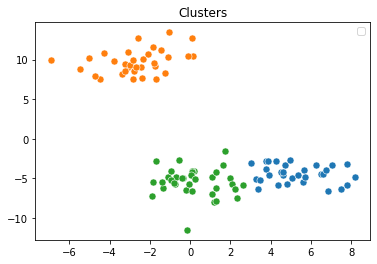

In [534]:
import seaborn as sns
sns.scatterplot(points[y_km == 0, 0], points[y_km == 0, 1],s=50)
sns.scatterplot(points[y_km == 1, 0], points[y_km == 1, 1],s=50)
sns.scatterplot(points[y_km == 2, 0], points[y_km == 2, 1],s=50)


plt.title('Clusters')
plt.legend()
plt.show()

In [535]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(centroids)


[[ 5.29483918 -4.43746415 -3.13269553 -2.79948796]
 [-2.68096115  9.7228058  -1.82887359  5.59668947]
 [ 0.20885695 -5.44872425 -4.66316624 -2.36332927]]


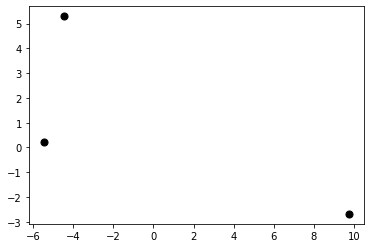

In [536]:
plt.scatter(centroids[:, 1], centroids[:, 0], c='black', s=50)